In [1]:
import argparse
import cv2
import matplotlib
import numpy as np
import os
from utils import gradient_sobel, drewHist
from utils import voting, scoring, centerPoint, symmetryAxis

In [2]:
inputFile = './Input/image.jpg'
outputPath = './Output'

if not os.path.exists(outputPath):
    os.mkdir(outputPath)

In [3]:
    # 讀取圖像
    img = cv2.imread(inputFile)
    img = cv2.resize(img, [256, 256])
    # 轉為灰度圖像
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

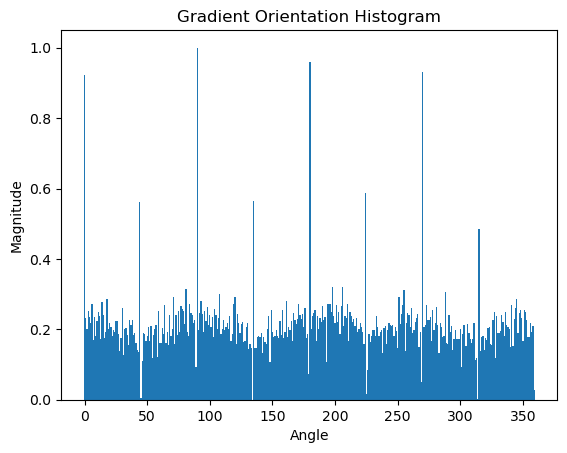

In [4]:
    # 計算梯度和方向
    gradient = gradient_sobel(gray)

    # 繪製梯度方向柱狀圖
    hist, _ = np.histogram(gradient['angle'], bins=360, range=(0, 360))
    saveName = outputPath + '/histogram_angle.jpg'
    drewHist(hist, saveName)

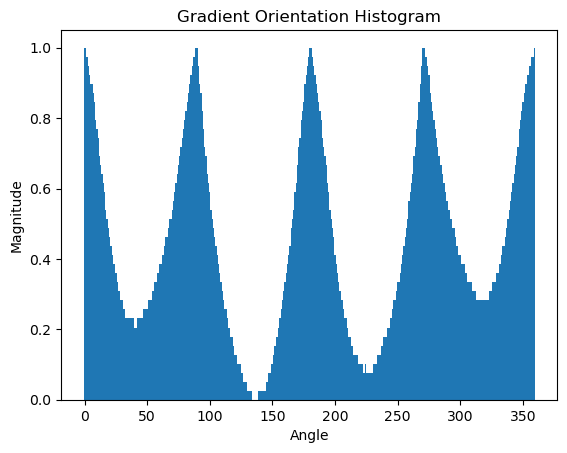

In [5]:
    # 投票
    votes = voting(gray, gradient['magnitude'])
    votes_hist = [np.sum(votes[ang]) for ang in range(0, 360)]
    # 繪製投票柱狀圖
    saveName = outputPath + '/histogram_vote.jpg'
    drewHist(votes_hist, saveName)

Candidate Angles:  [180]


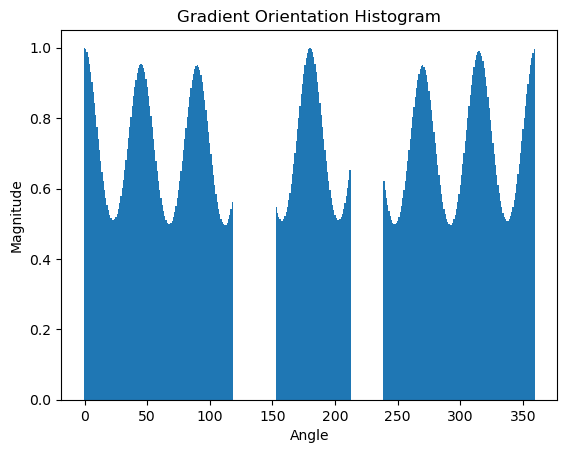

In [6]:

    # 分數篩選
    result = scoring(votes_hist)
    # 繪製分數柱狀圖
    saveName = outputPath + '/histogram_score.jpg'
    drewHist(result['score'], saveName)

In [7]:
    # 找到中點
    point = centerPoint(gray, votes, result['best_angle'])
    print('Center Point: ', point)

Center Point:  [129.06087754727372, 103.99096750504864]


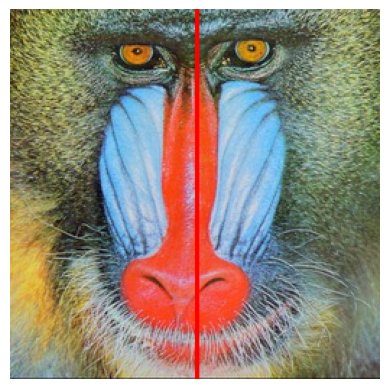

In [8]:
    # 繪製對稱軸並顯示結果
    saveName = outputPath + '/output.jpg'
    img_symmetry = symmetryAxis(img, result['best_angle'], point, saveName)